In [35]:
## Import dependencies
import requests as req
import json
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Get a master list of all cities that are available on openweather
cities = pd.read_csv("https://raw.githubusercontent.com/wingchen/citipy/master/citipy/worldcities.csv")
cities

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333
5,ad,ordino,42.550000,1.533333
6,ad,sant julia de loria,42.466667,1.500000
7,ae,abu dhabi,24.466667,54.366667
8,ae,dubai,25.258172,55.304717
9,ae,sharjah,25.357310,55.403304


In [37]:
# Select 800 cities - only need 500, but there will be some cities missing, so select a higher number just to be safe.
cities_sample = cities.sample(n=800)
cities_sample

,Country,City,Latitude,Longitude
41858,ua,vorozhba,51.173340,34.219171
33238,ro,harsova,44.683333,27.933333
7969,cz,horomerice,50.133877,14.334353
14700,gt,tectitan,15.333333,-92.033333
4220,br,valenca,-13.366667,-39.083333
27502,ph,bongabon,15.632100,121.144800
4708,ca,kimberley,49.683333,-115.983333
1251,ba,zenica,44.201389,17.906389
38708,ru,ulkan,57.242778,107.327778
12377,gb,cardross,55.966667,-4.633333


In [39]:
#Add some blank columns for later.
cities_sample["Temp"] = ""
cities_sample["Humidity"] = ""
cities_sample["Cloudiness"] = ""
cities_sample["Windspeed"] = ""

cities_sample

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed
41858,ua,vorozhba,51.173340,34.219171,,,,
33238,ro,harsova,44.683333,27.933333,,,,
7969,cz,horomerice,50.133877,14.334353,,,,
14700,gt,tectitan,15.333333,-92.033333,,,,
4220,br,valenca,-13.366667,-39.083333,,,,
27502,ph,bongabon,15.632100,121.144800,,,,
4708,ca,kimberley,49.683333,-115.983333,,,,
1251,ba,zenica,44.201389,17.906389,,,,
38708,ru,ulkan,57.242778,107.327778,,,,
12377,gb,cardross,55.966667,-4.633333,,,,


In [40]:
# Save config information
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/forecast?"



for index, row in cities_sample.iterrows():
    
    query_url = url + "appid=" + api_key + "&q=" + row["City"]
    weather_response = req.get(query_url)
    weather_json = weather_response.json()


    try:
        # Build query URL
       
        cities_sample.set_value(index, "Temp",weather_json["list"][1]['main']['temp_max'])
        cities_sample.set_value(index, "Humidity",weather_json["list"][0]['main']['humidity'])
        cities_sample.set_value(index, "Cloudiness",weather_json["list"][0]['clouds']['all'])
        cities_sample.set_value(index, "Windspeed",weather_json["list"][0]['wind']['speed'])
    
    # Get weather data

    except:
        print("trouble")
    #print(weather_json)

cities_sample

trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble
trouble


,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed
41858,ua,vorozhba,51.173340,34.219171,269.401,93,80,0.5
33238,ro,harsova,44.683333,27.933333,274.801,96,0,3.65
7969,cz,horomerice,50.133877,14.334353,274.57,82,0,6.2
14700,gt,tectitan,15.333333,-92.033333,,,,
4220,br,valenca,-13.366667,-39.083333,298.13,82,20,3.5
27502,ph,bongabon,15.632100,121.144800,297.18,96,88,0.75
4708,ca,kimberley,49.683333,-115.983333,290.126,67,64,3.1
1251,ba,zenica,44.201389,17.906389,267.151,83,0,1.7
38708,ru,ulkan,57.242778,107.327778,,,,
12377,gb,cardross,55.966667,-4.633333,276.551,100,36,8.25


In [ ]:
** Just put the "trouble" line in there to make sure the code continues at breaks.  These lines wind up having blanks in the
new columns. **

In [42]:
# Replaced the blank columns with nan so I can eliminate these rows.
import numpy as np
cities_sample['Temp'].replace('', np.nan, inplace=True)
cities_sample

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed
41858,ua,vorozhba,51.173340,34.219171,269.401,93,80,0.5
33238,ro,harsova,44.683333,27.933333,274.801,96,0,3.65
7969,cz,horomerice,50.133877,14.334353,274.570,82,0,6.2
14700,gt,tectitan,15.333333,-92.033333,NaN,,,
4220,br,valenca,-13.366667,-39.083333,298.130,82,20,3.5
27502,ph,bongabon,15.632100,121.144800,297.180,96,88,0.75
4708,ca,kimberley,49.683333,-115.983333,290.126,67,64,3.1
1251,ba,zenica,44.201389,17.906389,267.151,83,0,1.7
38708,ru,ulkan,57.242778,107.327778,NaN,,,
12377,gb,cardross,55.966667,-4.633333,276.551,100,36,8.25


In [43]:
#Drop the nan rows - now I still have more than 500 total cities.
cities_sample2 = pd.DataFrame(cities_sample.dropna(how='any'))
cities_sample2

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed
41858,ua,vorozhba,51.173340,34.219171,269.401,93,80,0.5
33238,ro,harsova,44.683333,27.933333,274.801,96,0,3.65
7969,cz,horomerice,50.133877,14.334353,274.570,82,0,6.2
4220,br,valenca,-13.366667,-39.083333,298.130,82,20,3.5
27502,ph,bongabon,15.632100,121.144800,297.180,96,88,0.75
4708,ca,kimberley,49.683333,-115.983333,290.126,67,64,3.1
1251,ba,zenica,44.201389,17.906389,267.151,83,0,1.7
12377,gb,cardross,55.966667,-4.633333,276.551,100,36,8.25
17387,in,chandrapur,19.950000,79.300000,287.451,78,8,1.65
8817,de,fellbach,48.800000,9.283333,278.670,72,80,8.65


In [44]:
# Take a randome sample of 500 of the remaining cities.
cities_sample2 = cities_sample2.sample(n=500)
cities_sample2

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed
920,au,port hedland,-20.312149,118.610588,303.280,60,92,0.7
27643,ph,cabaluay,7.000330,122.178502,299.601,100,44,0.3
39959,sv,san agustin,13.433333,-88.600000,297.420,37,12,3
17938,in,jagdispur,25.483333,84.416667,287.801,85,8,2.05
44632,us,trenton,40.216944,-74.743333,276.640,53,0,3.85
35620,ru,chernyakhovsk,54.633450,21.815566,276.001,90,88,6.8
34399,ro,surdila-gaiseanca,45.066667,27.333333,272.301,96,0,2.9
36695,ru,kurchanskaya,45.198333,37.507222,277.820,96,92,5.45
7685,cu,ciego de avila,21.840000,-78.761944,299.530,80,44,1.15
14878,hn,el perico,15.083333,-88.100000,295.330,93,100,1.15


In [74]:
#Convert kelvins to fahrenheit
#Convert meters per second to miles per hour
#Add a column for absolute value of latitude to represent distance from equator.
cities_sample2["Fahrenheit"] = (9/5)*(cities_sample2["Temp"]-273)+32
cities_sample2["wind_mph"] = cities_sample2["Windspeed"]*2.23694
cities_sample2["equator_distance"] = cities_sample2["Latitude"].abs()
cities_sample2

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed,Fahrenheit,wind_mph,equator_distance
920,au,port hedland,-20.312149,118.610588,303.280,60,92,0.7,86.5040,1.56586,20.312149
27643,ph,cabaluay,7.000330,122.178502,299.601,100,44,0.3,79.8818,0.671082,7.000330
39959,sv,san agustin,13.433333,-88.600000,297.420,37,12,3,75.9560,6.71082,13.433333
17938,in,jagdispur,25.483333,84.416667,287.801,85,8,2.05,58.6418,4.58573,25.483333
44632,us,trenton,40.216944,-74.743333,276.640,53,0,3.85,38.5520,8.61222,40.216944
35620,ru,chernyakhovsk,54.633450,21.815566,276.001,90,88,6.8,37.4018,15.2112,54.633450
34399,ro,surdila-gaiseanca,45.066667,27.333333,272.301,96,0,2.9,30.7418,6.48713,45.066667
36695,ru,kurchanskaya,45.198333,37.507222,277.820,96,92,5.45,40.6760,12.1913,45.198333
7685,cu,ciego de avila,21.840000,-78.761944,299.530,80,44,1.15,79.7540,2.57248,21.840000
14878,hn,el perico,15.083333,-88.100000,295.330,93,100,1.15,72.1940,2.57248,15.083333


In [75]:
#Convert columns to numeric for plotting requirements.
cities_sample = cities_sample2.convert_objects(convert_numeric=True)
cities_sample.dtypes

C:\Users\tgsxp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Country              object
City                 object
Latitude            float64
Longitude           float64
Temp                float64
Humidity              int64
Cloudiness            int64
Windspeed           float64
Fahrenheit          float64
wind_mph            float64
equator_distance    float64
dtype: object

In [104]:
#Save the final list of cities.
cities_sample.to_csv('cities.csv')

In [77]:
cities_sample.apply(pd.to_numeric, errors='ignore')
High_Temp = cities_sample.loc[cities_sample['Fahrenheit'] > 70]
Medium_Temp = cities_sample.loc[(cities_sample['Fahrenheit'] > 65) & (cities_sample['Fahrenheit'] <= 70)]
Low_Temp = cities_sample.loc[cities_sample['Fahrenheit'] < 65]

** Band temperature into high, medium and low (could have used binning techniques - I was in a hurry so I used trial and error
for my grouping.  This is to see if there is a pattern/clustering of temperature bands by latitude.  Graphs below.  **

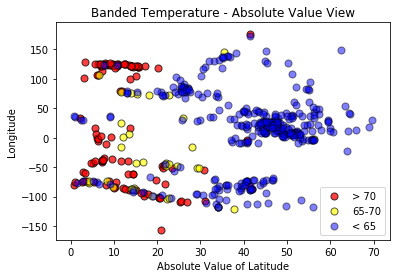

In [84]:
cities_sample.apply(pd.to_numeric, errors='ignore')
High_plot = plt.scatter(High_Temp["equator_distance"], High_Temp["Longitude"], marker="o", facecolors="red", edgecolors="black",
            s=50, alpha=0.75,label = "> 70")
Medium_plot = plt.scatter(Medium_Temp["equator_distance"], Medium_Temp["Longitude"], marker="o", facecolors="yellow", edgecolors="black",
            s=50, alpha=0.65,label = "65-70")
Low_plot = plt.scatter(Low_Temp["equator_distance"], Low_Temp["Longitude"], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5,label = "< 65")
plt.title("Banded Temperature - Absolute Value View")
plt.legend(handles=[High_plot, Medium_plot, Low_plot], loc="best")
plt.xlabel("Absolute Value of Latitude")
plt.ylabel("Longitude")
plt.savefig('Banded Temp- Absolute Value.png')
plt.show()

** The above plot is saved as "Banded Temp - Absolute Value". **
** This plot shows a concentration of red dots around 0 degrees latitude (which is the equator). **
** Yellows dots are clustered a little further from 0 degrees latitude. **
** Finally, when you get furthest away from the equator - all the dots are blue - the coldest group. **
** I created 2 versions of each graph - one that uses latitude, and one that uses absolute value of latitude.
Absolute Value means you can move left to right to get distance from equator, instead of having to look at 
distance from center of the graph.  This is a more intuitive view, but it does not differentiate between direction
of distance from equator (west or east)**

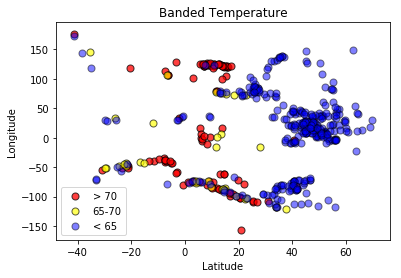

In [85]:
cities_sample.apply(pd.to_numeric, errors='ignore')
High_plot = plt.scatter(High_Temp["Latitude"], High_Temp["Longitude"], marker="o", facecolors="red", edgecolors="black",
            s=50, alpha=0.75,label = "> 70")
Medium_plot = plt.scatter(Medium_Temp["Latitude"], Medium_Temp["Longitude"], marker="o", facecolors="yellow", edgecolors="black",
            s=50, alpha=0.65,label = "65-70")
Low_plot = plt.scatter(Low_Temp["Latitude"], Low_Temp["Longitude"], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5,label = "< 65")
plt.title("Banded Temperature")
plt.legend(handles=[High_plot, Medium_plot, Low_plot], loc="best")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig('Banded Temp.png')
plt.show()

** The above plot is saved as "Banded Temp". **
** This plot shows a concentration of red dots around 0 degrees latitude (which is the equator). **
** Yellows dots are clustered a little further from 0 degrees latitude. **
** Finally, when you get furthest away from the equator - all the dots are blue - the coldest group. **

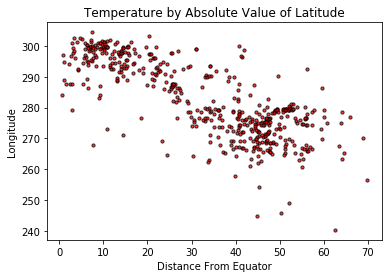

In [86]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["equator_distance"], cities_sample["Temp"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")

plt.title("Temperature by Absolute Value of Latitude")
plt.xlabel("Distance From Equator")
plt.ylabel("Longitude")
plt.savefig('Temp by Lat - Absolute Value.png')


plt.show()

** The above graph shows temperature by absolute value of latitude.  There is clearly a decreasing pattern from 0 up.  **
** While a data visualization is a good start, in order to be sure there is a relationship, I would plot a regression line **
** and use a goodness of fit statistic such as R-Squared or Adjusted R-Squared.  **
** This graph does support the assertion that temps increase as you get closer to the equator.  A relationship is indicated by
patterns.  Randomness would indicate a lack of a relationship. **

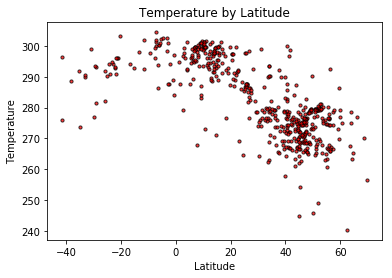

In [93]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["Latitude"], cities_sample["Temp"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")

plt.title("Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('Temp by Lat.png')


plt.show()

** This is the same as the prior graph, but looking at latitude, instead of absolute value of latitude. **
** Here, the pattern still holds (decreasing temp as distance from equator increases).**
** With absolute value, you see a downward pattern as you move from left to right.  **
** Here, you see a downward pattern as you move from the center of the graph (0 latitude which is the equator)**
** I think absolute value makes it easier to visualize, but maybe more complex to understand.  **
** Using absolute value would probably work better for regression as well. **

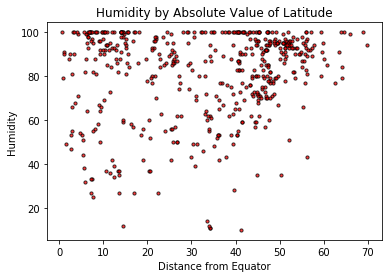

In [92]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["equator_distance"], cities_sample["Humidity"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")

plt.title("Humidity by Absolute Value of Latitude")
plt.xlabel("Distance from Equator")
plt.ylabel("Humidity")
plt.savefig('Humidity by Lat - Absolute Value.png')

plt.show()

** Humidity by Absolute Value of Latitude.  No discernable pattern here. **
** Randomness indicates no relationship between the axis variables. **
** Based on this initial view - there does not seem to be a relationship between latitude and Humidity. **

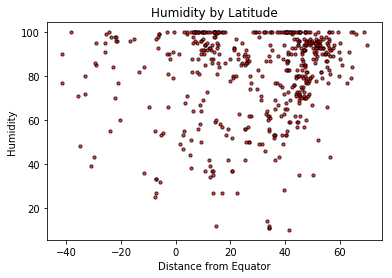

In [94]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["Latitude"], cities_sample["Humidity"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")

plt.title("Humidity by Latitude")
plt.xlabel("Distance from Equator")
plt.ylabel("Humidity")
plt.savefig('Humidity by Lat.png')


plt.show()

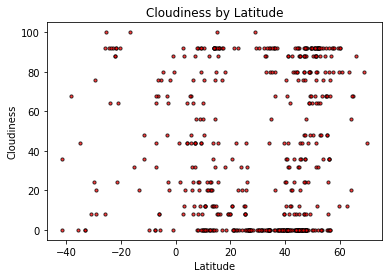

In [96]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["Latitude"], cities_sample["Cloudiness"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")


plt.title("Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('Cloudiness by Lat.png')


plt.show()

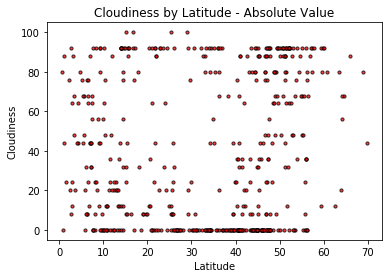

In [99]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["equator_distance"], cities_sample["Cloudiness"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")


plt.title("Cloudiness by Latitude - Absolute Value")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('Cloudiness by Lat - Absolute Value.png')


plt.show()

** The above plot is saved as "Cloudiness by Lat.png".  This plot appears to be random - which suggests there is no 
relationship between latitude and cloudiness. **

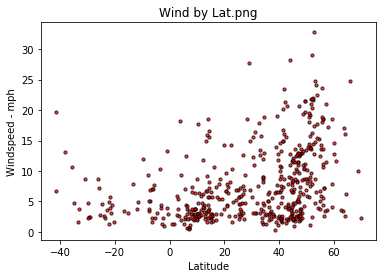

In [100]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["Latitude"], cities_sample["wind_mph"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")

plt.title("Wind by Lat.png")
plt.xlabel("Latitude")
plt.ylabel("Windspeed - mph")
plt.savefig('Wind by Lat.png')


plt.show()

** The above graph shows windspeed by latitude.  There does appear to be a bit of a pattern - though not as strong of a
relationship as the temperature by latitude graph suggests.  This graph shows some indication of increasing windspeed
as distance from the equator increases. **

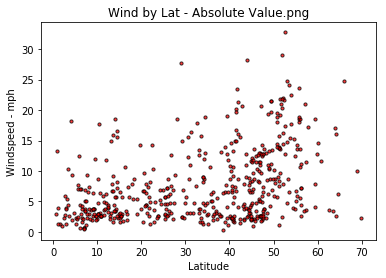

In [101]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["equator_distance"], cities_sample["wind_mph"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")

plt.title("Wind by Lat - Absolute Value.png")
plt.xlabel("Latitude")
plt.ylabel("Windspeed - mph")
plt.savefig('Wind by Lat - Absolute Value.png')


plt.show()

** Possibly a pattern of increasing windspeed by increasing distancde from equator. **
** Looks more random than the view without absolute value. **

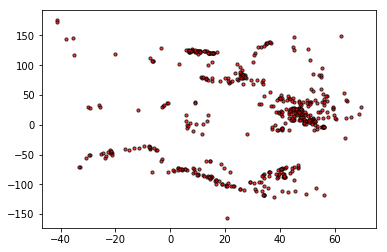

In [103]:
cities_sample.apply(pd.to_numeric, errors='ignore')
weather_plot = plt.scatter(cities_sample["Latitude"], cities_sample["Longitude"], marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75,label = "c")
plt.show()

**This is just a plot of all the cities in the 500 city sample. **
** This graph is used to verify that the 500 city selection is basically random and that there is a good representation
of the various latitude/longitude values.  This should (and does) look random.  **